In [1]:
from IPython.display import Image

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 디스크 컨트롤러

- 프로그래머스 힙 정렬 문제
- 링크: https://programmers.co.kr/learn/courses/30/lessons/42627

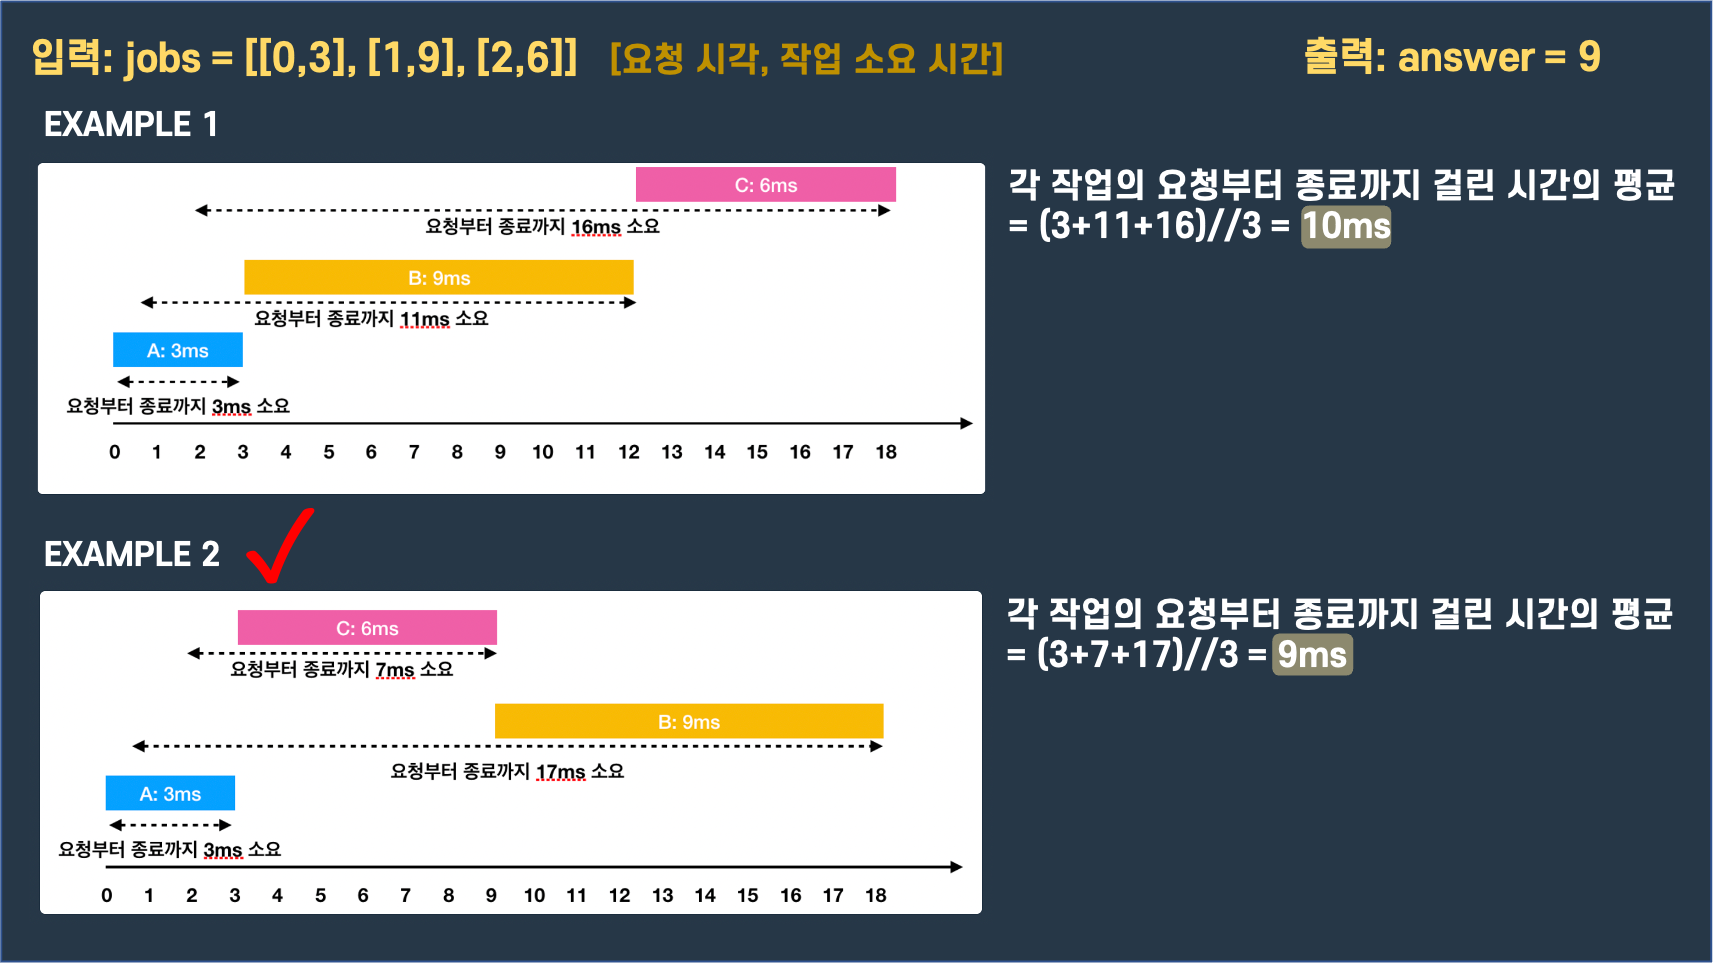

In [6]:
Image("/content/gdrive/My Drive/스터디-알고리즘/_Data/5-summary.png", height=600)

### 문제 설명

- 하드디스크는 한 번에 하나의 작업만 수행, 두 조건 만족
#### **1. 각 작업의 요청부터 종료까지 걸린 시간의 평균 최소화**
#### **2. 디스크가 작업을 수행하고 있지 않을 때에는 먼저 요청이 들어온 작업부터 처리**
<br>

- 힙은 **루트 노드에 우선순위가 가장 높은 데이터를 위치**시킬 수 있는 자료구조, 우선순위큐를 구현할 때 사용하는 방법 중 하나로 힙을 이용해서 문제 풀이
- 파이썬의 힙은 기본 **최소힙**
- 구현된 함수를 이용하면 효율적인데, 노드 추가 시 **heappush(list, node)**, 노드 삭제 시 **heappop(list)**를 이용


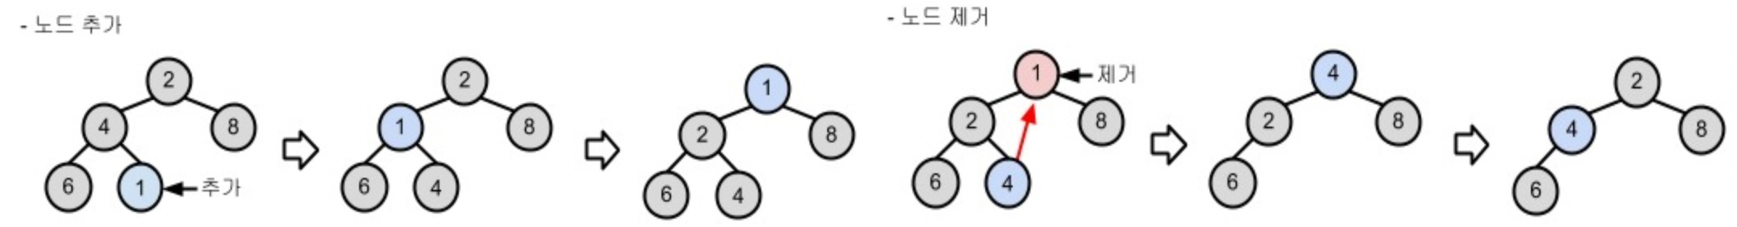

In [5]:
Image("/content/gdrive/My Drive/스터디-알고리즘/_Data/5-heap.png", height=150)

<br>
<br>
<br>





# 시행착오 1
<br>

기본적으로,
1. 작업을 요청 시각 기준으로 sort(2번 조건)
2. 디스크가 작업 중인 경우, **waiting(대기 중인 작업, 힙)에 소요 시간 기준(1번 조건)으로 push(추가)**
3. 디스크에 작업이 없는 경우, **waiting에서 루트 노드를 pop(제거)**
4. sum에 지금까지 수행된 작업의 요청부터 종료까지 걸린 시간 누적
5. time에 지금까지 수행된 작업 종료(될) 시각 기록

In [8]:
import heapq

def solution(jobs):
    answer = 0
    time = 0
    jobs.sort()
    waiting = []
    sum = 0
    
    for s, d in jobs:
        # 디스크에 작업이 없는 경우
        if s >= time: 
            while waiting: # 대기 작업이 있을 때,
                ed, es = heapq.heappop(waiting)
                sum += (time - es) + ed # waiting time + duration
                time += ed

        heapq.heappush(waiting, [d,s])
    
    # 남아있는 작업 수행
    while waiting: 
        ed, es = heapq.heappop(waiting)
        sum += (time - es) + ed # waiting time + duration
        time += ed     
    
    answer = sum // len(jobs)
    return answer

In [9]:
jobs = [[0, 3], [1, 9], [2, 6]] # 정답 9
solution(jobs)

9

In [10]:
jobs = [[0, 10], [2, 12], [9, 19], [15, 17]] # 25
solution(jobs) # 실패
# 문제는 디스크에 작업이 없을 때 지금까지 waiting에 있는 모든 노드를 반환

26

<br>
<br>
<br>





# 시행착오 2
<br>

디스크에 작업이 없는 경우를 나누지 않고, 대신 **현재 요청 시각이 작업의 종료 시각보다 클 때까지 반환** <br>
대신 waiting이 비어있는 경우 break

In [12]:
import heapq

def solution(jobs):
    answer = 0
    time = 0
    jobs.sort()
    waiting = []
    sum = 0
    
    for s, d in jobs:
        while s >= time: # *
            if len(waiting) == 0: # *
                break
            ed, es = heapq.heappop(waiting)
            sum += (time - es) + ed # waiting time + duration
            time += ed
            
        heapq.heappush(waiting, [d,s])

    # 남아있는 작업 수행
    while waiting:
        ed, es = heapq.heappop(waiting)
        sum += (time - es) + ed # waiting time + duration
        time += ed     
    
    answer = sum // len(jobs)
    return answer

In [13]:
jobs = [[0, 10], [2, 12], [9, 19], [15, 17]] # 25
solution(jobs) # 성공

25

In [14]:
jobs = [[1000, 1000]] # 1000
solution(jobs) # 실패
# 이렇게 작업이 하나일 경우 waiting이 비어있을 것이고 이러한 경우, 힙에 넣지 말고 바로 수행해야 함

0

<br>
<br>
<br>





# 최종 풀이
<br>

while - else 문을 이용하여, 만약 waiting이 빈 경우 바로 수행하고 break를 하고, 그렇지 않은 경우 heap에 push 하도록 변환

In [15]:
import heapq

def solution(jobs):
    answer = 0
    time = 0
    jobs.sort()
    waiting = []
    sum = 0
    
    for s, d in jobs:
        while s >= time:
            if len(waiting) == 0: # * 힙에 넣지 않고 바로 실행
                sum += d
                time = s + d
                break
            ed, es = heapq.heappop(waiting)
            sum += (time - es) + ed # waiting time + duration
            time += ed
        else:  
            heapq.heappush(waiting, [d,s])

    # 남아있는 작업 수행
    while waiting:
        ed, es = heapq.heappop(waiting)
        sum += (time - es) + ed # waiting time + duration
        time += ed     
    
    answer = sum // len(jobs)
    return answer

In [16]:
jobs = [[1000, 1000]] # 1000
solution(jobs) # 성공

1000

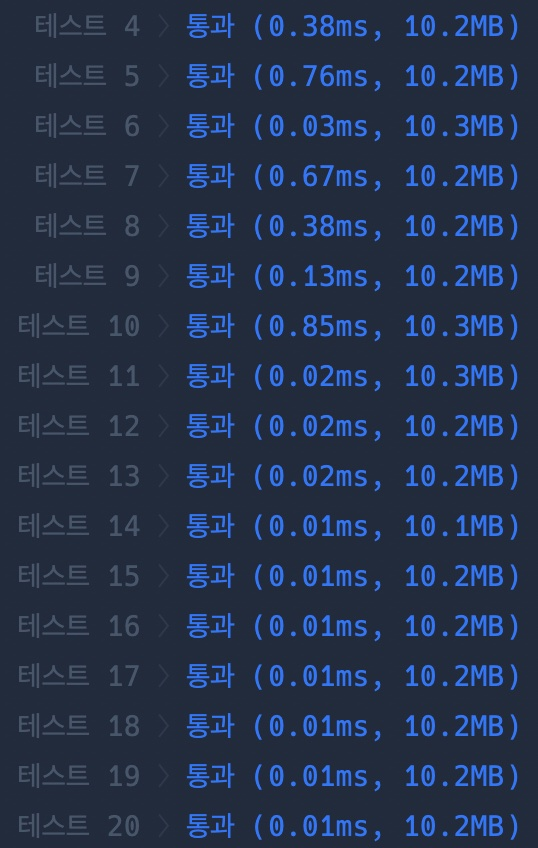

In [19]:
Image("/content/gdrive/My Drive/스터디-알고리즘/_Data/5-success1.jpg", height=300)

<br>
<br>
<br>



## 다른 풀이 (생략)